In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret --quiet
!pip install shap --quiet
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.5 MB/s e

In [ ]:
!pip install --upgrade scipy
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages 

In [ ]:
from pycaret.classification import load_model

# 모델 불러오기
loaded_model = load_model('/content/drive/MyDrive/Pycret/saved_model')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['연령'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['장애유형', '중증여부', '근무지역'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encodi...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             objective='multi:softprob', ...)),
                                              ('Logistic Regression',
                                               LogisticRegression(max_iter=1000,
                                                                  random_state=4234))],
                                  n_jobs=-1, voting='soft'))])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## Input 넣기

In [ ]:
from pycaret.classification import predict_model
user_input = {
    '연령': float(input("연령을 입력하세요: ")),
    '장애유형': input("장애유형을 입력하세요: "),
    '중증여부': input("중증여부를 입력하세요: "),
    '근무지역': input("근무지역을 입력하세요: "),
}

user_data = pd.DataFrame([user_input])

연령을 입력하세요: 50
장애유형을 입력하세요: 청각장애
중증여부를 입력하세요: 중증
근무지역을 입력하세요: 경기


In [ ]:
# 예측 수행
final_model = loaded_model
predictions = predict_model(final_model, data=user_data, raw_score = True)
predictions

,연령,장애유형,중증여부,근무지역,prediction_label,prediction_score_건설·채굴 연구개발직 및 공학기술직,prediction_score_건설·채굴직,prediction_score_경영·행정·사무직,prediction_score_경호·경비직,prediction_score_관리직(임원·부서장),...,prediction_score_운전·운송직,prediction_score_음식 서비스직,prediction_score_인쇄·목재·공예 및 기타 설치·정비·생산직,prediction_score_전기·전자 설치·정비·생산직,prediction_score_정보통신 설치·정비직,prediction_score_정보통신 연구개발직 및 공학기술직,prediction_score_제조 단순직,prediction_score_제조 연구개발직 및 공학기술직,prediction_score_청소 및 기타 개인서비스직,prediction_score_화학·환경 설치·정비·생산직
0,50.0,청각장애,중증,경기,경영·행정·사무직,0.0004,0.0009,0.3181,0.0115,0.0069,...,0.0041,0.0168,0.0311,0.1032,0.0,0.0023,0.2098,0.0059,0.1659,0.0142


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 'prediction_label'까지 포함하는 첫 번째 테이블 -> 1등알려주기
first_table = predictions.loc[:, :'prediction_label']
first_table


,연령,장애유형,중증여부,근무지역,prediction_label
0,50.0,청각장애,중증,경기,경영·행정·사무직


In [ ]:
# 2. 'prediction_score_건설·채굴 연구개발직 및 공학기술직'부터 시작하는 두 번째 테이블
second_table = predictions.loc[:, 'prediction_score_건설·채굴 연구개발직 및 공학기술직':]
second_table

,prediction_score_건설·채굴 연구개발직 및 공학기술직,prediction_score_건설·채굴직,prediction_score_경영·행정·사무직,prediction_score_경호·경비직,prediction_score_관리직(임원·부서장),prediction_score_교육직,prediction_score_금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),prediction_score_금융·보험직,prediction_score_기계 설치·정비·생산직,prediction_score_농림어업직,...,prediction_score_운전·운송직,prediction_score_음식 서비스직,prediction_score_인쇄·목재·공예 및 기타 설치·정비·생산직,prediction_score_전기·전자 설치·정비·생산직,prediction_score_정보통신 설치·정비직,prediction_score_정보통신 연구개발직 및 공학기술직,prediction_score_제조 단순직,prediction_score_제조 연구개발직 및 공학기술직,prediction_score_청소 및 기타 개인서비스직,prediction_score_화학·환경 설치·정비·생산직
0,0.0004,0.0009,0.3181,0.0115,0.0069,0.001,0.0028,0.0003,0.0348,0.0026,...,0.0041,0.0168,0.0311,0.1032,0.0,0.0023,0.2098,0.0059,0.1659,0.0142


In [ ]:
# 두 번째 테이블의 컬럼 이름에서 'prediction_score_' 제거
second_table.columns = [col.replace('prediction_score_', '') for col in second_table.columns]
second_table

,건설·채굴 연구개발직 및 공학기술직,건설·채굴직,경영·행정·사무직,경호·경비직,관리직(임원·부서장),교육직,금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),금융·보험직,기계 설치·정비·생산직,농림어업직,...,운전·운송직,음식 서비스직,인쇄·목재·공예 및 기타 설치·정비·생산직,전기·전자 설치·정비·생산직,정보통신 설치·정비직,정보통신 연구개발직 및 공학기술직,제조 단순직,제조 연구개발직 및 공학기술직,청소 및 기타 개인서비스직,화학·환경 설치·정비·생산직
0,0.0004,0.0009,0.3181,0.0115,0.0069,0.001,0.0028,0.0003,0.0348,0.0026,...,0.0041,0.0168,0.0311,0.1032,0.0,0.0023,0.2098,0.0059,0.1659,0.0142


In [ ]:
# 데이터프레임 전치 (Transpose)
second_table_T = second_table.T.rename(columns={0: 'prediction_score'})

# "prediction_score"를 기준으로 오름차순 정렬
df_sorted = second_table_T.sort_values(by='prediction_score', ascending=False)
df_sorted

,prediction_score
경영·행정·사무직,0.3181
제조 단순직,0.2098
청소 및 기타 개인서비스직,0.1659
전기·전자 설치·정비·생산직,0.1032
기계 설치·정비·생산직,0.0348
인쇄·목재·공예 및 기타 설치·정비·생산직,0.0311
음식 서비스직,0.0168
돌봄 서비스직(간병·육아),0.0158
화학·환경 설치·정비·생산직,0.0142
경호·경비직,0.0115


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 런타임 다시 시작 후 아래 코드 실행

import matplotlib.font_manager as fm

# 나눔고딕 설치 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_path, size=12).get_name()

# 한글 폰트 설정
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


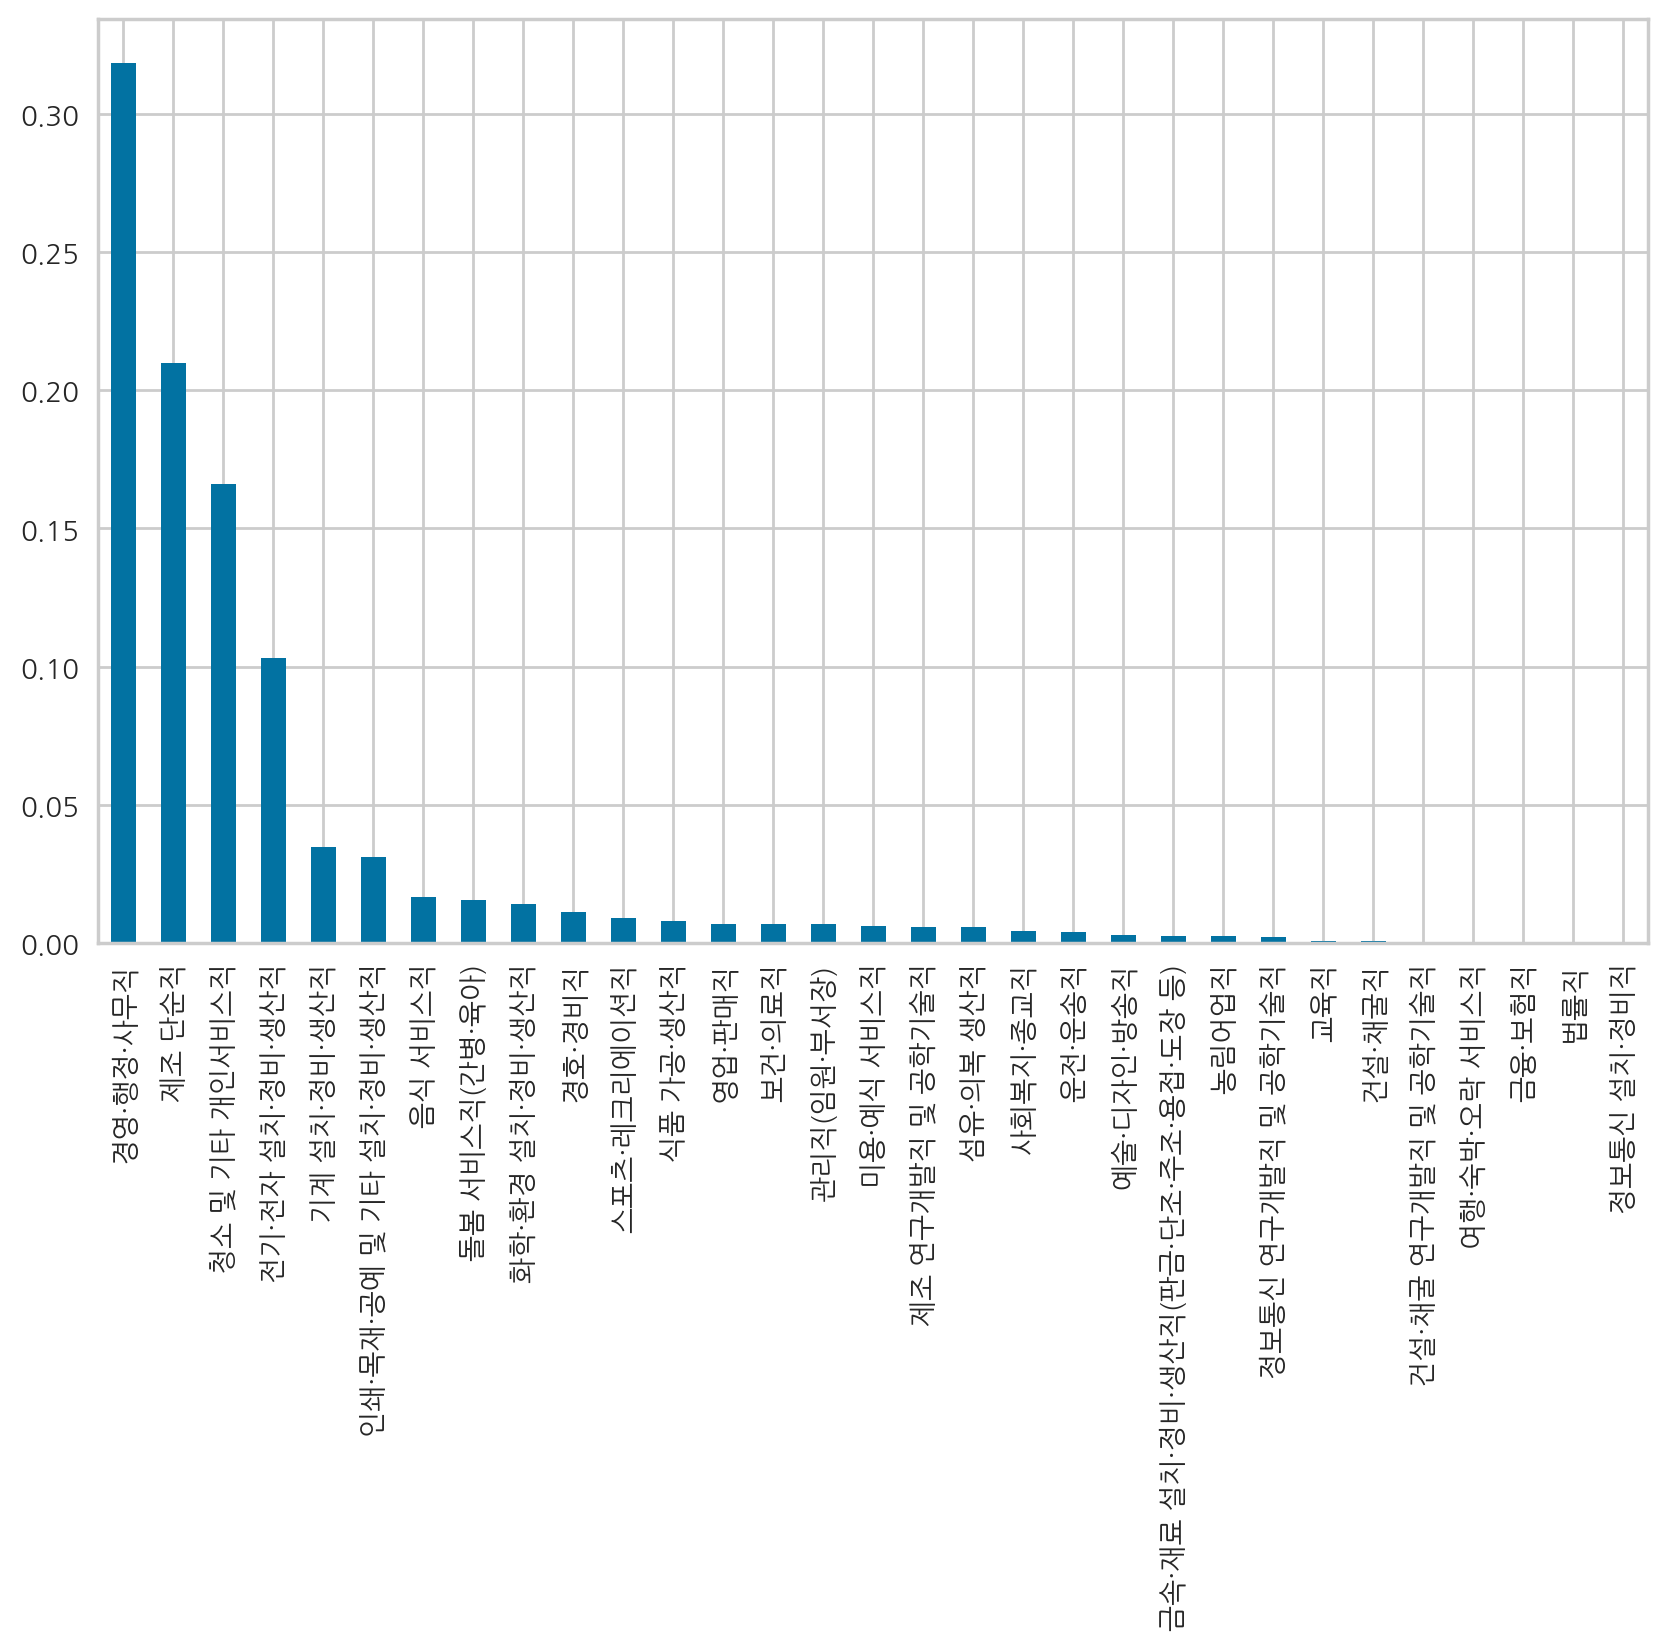

In [ ]:
# 2번 테이블 시각화
plt.figure(figsize=(10, 6))

# 여기에 두 번째 테이블 시각화 코드 (예: 여러 개의 바 차트, 히트맵 등)
second_table.mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [ ]:
# 필요한 라이브러리 및 폰트 설정
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 나눔고딕 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# 한글 폰트 설정
sns.set(font=font_prop.get_name())
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

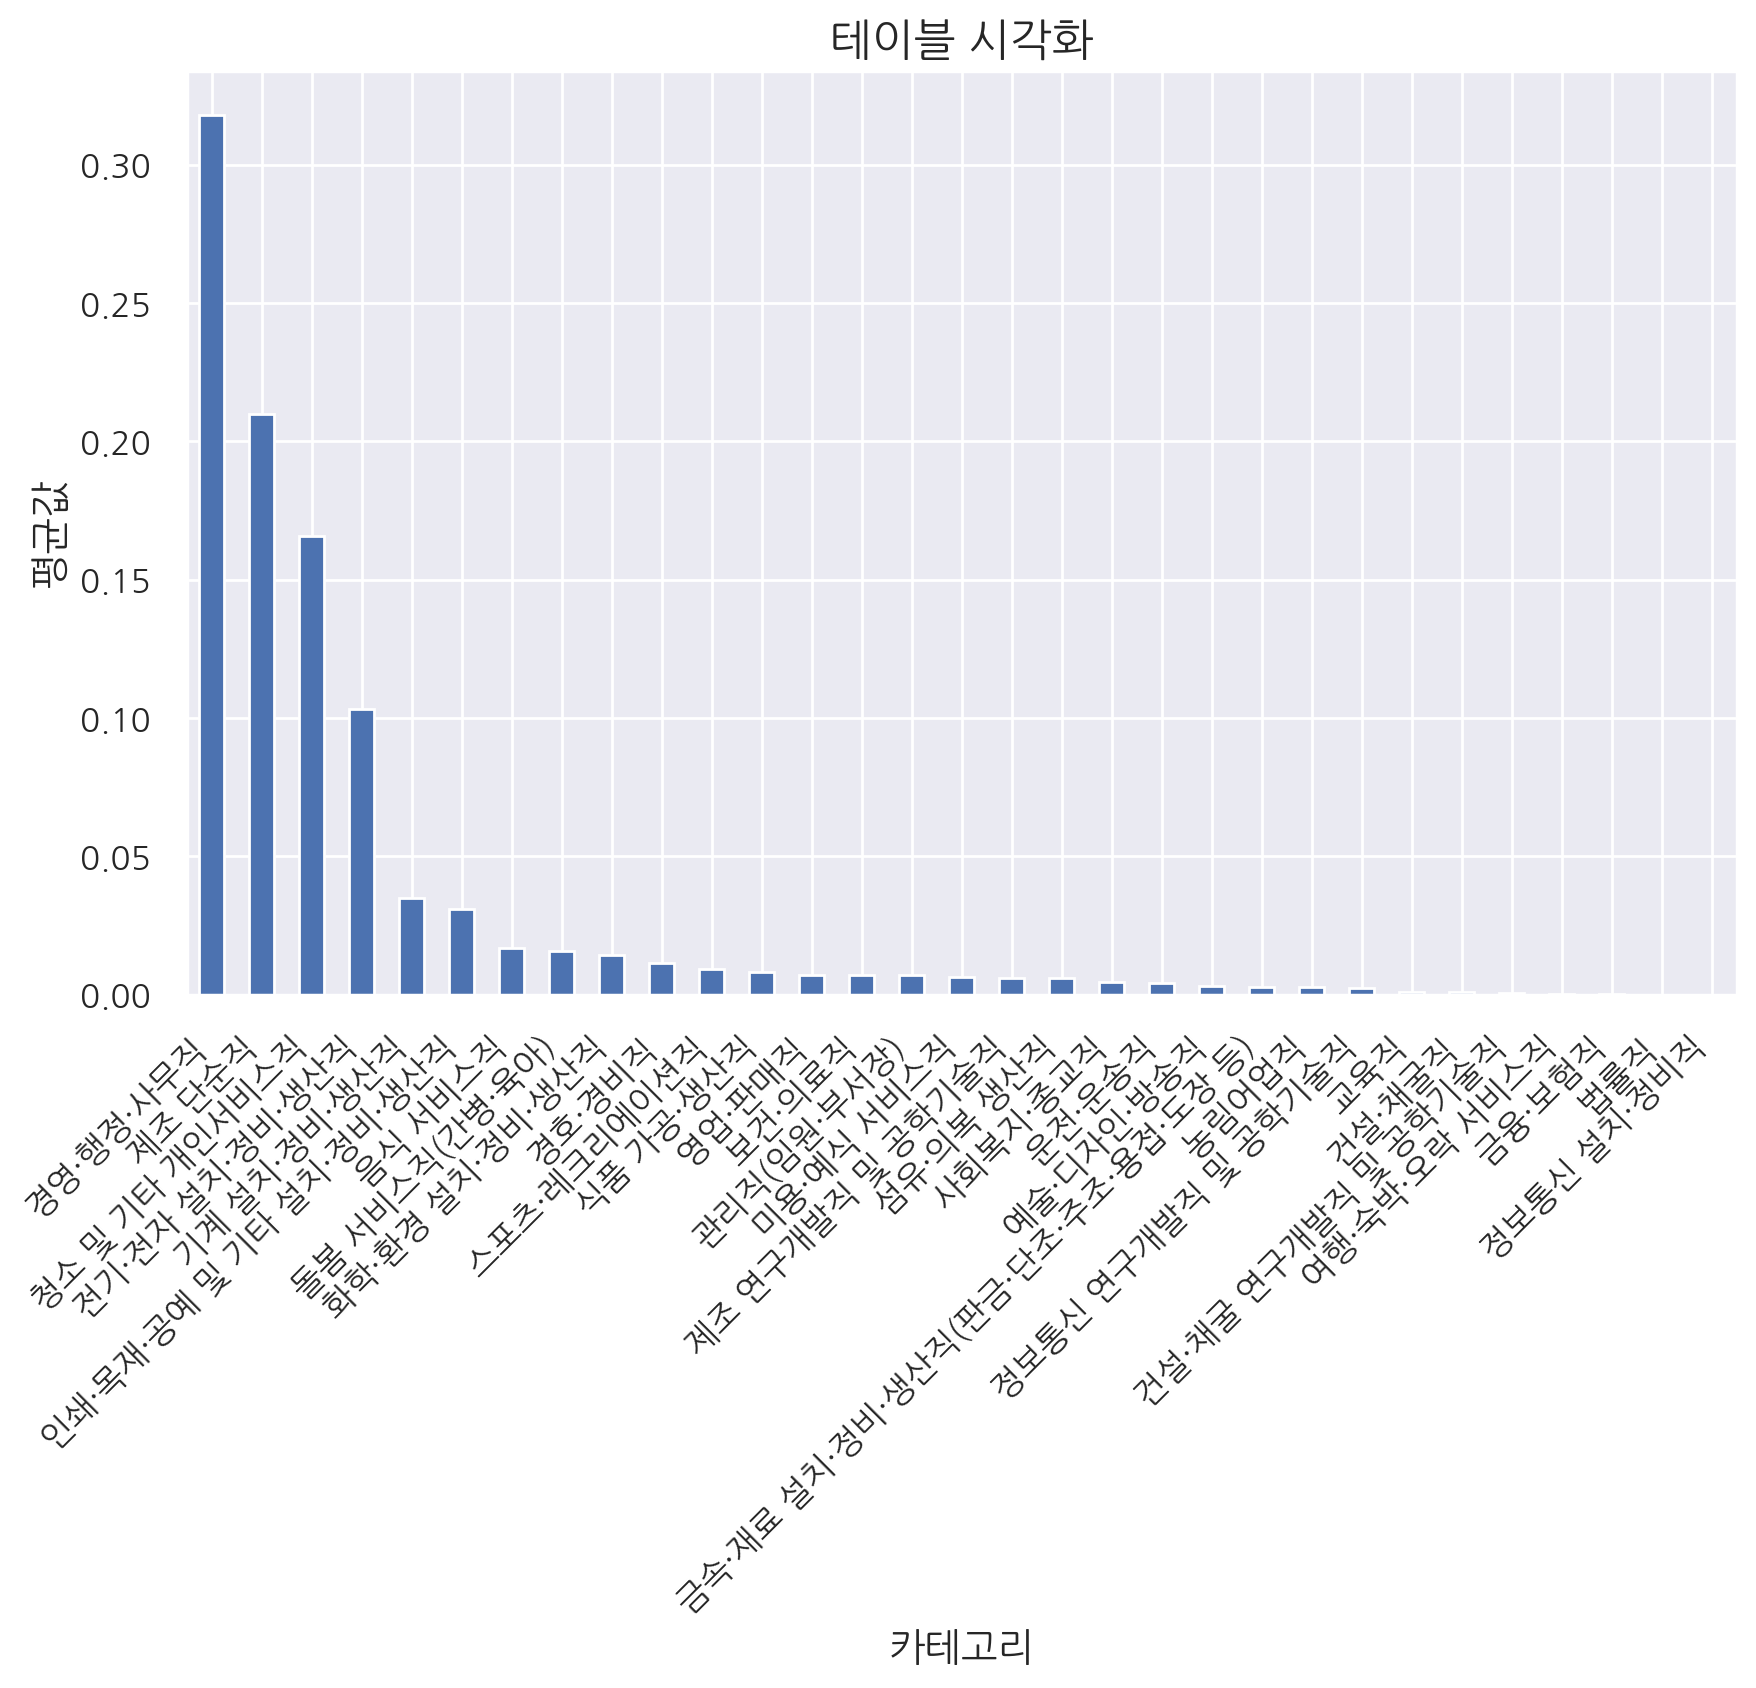

In [ ]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
second_table.mean().sort_values(ascending=False).plot(kind='bar')
plt.title('테이블 시각화', fontsize=16)
plt.xlabel('카테고리', fontsize=14)
plt.ylabel('평균값', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()
